In [1]:
## importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Configure plot styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

print("--- Loading Data ---")
# Loading dataset
try:
    df = pd.read_csv('/content/drive/MyDrive/Data/WHO-COVID-19-global-daily-data.csv')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: 'WHO-COVID-19-global-daily-data.csv' not found. Please ensure the file is in the correct directory.")
    exit()

--- Loading Data ---
Data loaded successfully!


In [14]:
print(df.columns.tolist())
df.columns = df.columns.str.strip()

['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']


In [15]:
# Displaying basic information
print("\n--- DataFrame Head ---")
print(df.head())

print("\n--- DataFrame Info ---")
df.info()

print("\n--- DataFrame Description (Numerical Columns) ---")
print(df.describe())

print("\n--- Unique Countries in Dataset ---")
print(f"Total unique countries: {df['Country'].nunique()}")
print(df['Country'].unique()[:10]) # Print first 10 unique countries
print("\n--- Unique WHO Regions in Dataset ---")
print(f"Total unique WHO Regions: {df['WHO_region'].nunique()}")
print(df['WHO_region'].unique())


--- DataFrame Head ---
  Date_reported Country_code                           Country WHO_region  \
0    2020-01-04           VC  Saint Vincent and the Grenadines        AMR   
1    2020-01-04           SN                           Senegal        AFR   
2    2020-01-04           SB                   Solomon Islands        WPR   
3    2020-01-04           LK                         Sri Lanka       SEAR   
4    2020-01-04           SY              Syrian Arab Republic        EMR   

   New_cases  Cumulative_cases  New_deaths  Cumulative_deaths  
0        NaN                 0         NaN                  0  
1        NaN                 0         NaN                  0  
2        0.0                 0         0.0                  0  
3        0.0                 0         0.0                  0  
4        NaN                 0         NaN                  0  

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474240 entries, 0 to 474239
Data columns (total 8 colum

In [17]:
# Data Cleaning and Preprocessing
print("--- Data Cleaning and Preprocessing ---")

# Convert 'Date_reported' to datetime objects
df['Date_reported'] = pd.to_datetime(df['Date_reported'])
print("\n'Date_reported' column converted to datetime format.")

# Check for missing values
print("\n--- Missing Values Before Handling ---")
print(df.isnull().sum())

# Handle missing values: In this dataset, if 'New_cases' or 'New_deaths' are NaN,
# it likely means 0. We'll fill NaNs with 0.
df['New_cases'] = df['New_cases'].fillna(0).astype(int)
df['New_deaths'] = df['New_deaths'].fillna(0).astype(int)
print("\nMissing values in 'New_cases' and 'New_deaths' filled with 0.")

# Re-check for missing values
print("\n--- Missing Values After Handling ---")
print(df.isnull().sum())

# Sort data by Date_reported and Country for consistent aggregation
df = df.sort_values(by=['Date_reported', 'Country']).reset_index(drop=True)
print("\nData sorted by 'Date_reported' and 'Country'.")
print("\nPreprocessing complete.")

--- Data Cleaning and Preprocessing ---

'Date_reported' column converted to datetime format.

--- Missing Values Before Handling ---
Date_reported           0
Country_code         1976
Country                 0
WHO_region              0
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

Missing values in 'New_cases' and 'New_deaths' filled with 0.

--- Missing Values After Handling ---
Date_reported           0
Country_code         1976
Country                 0
WHO_region              0
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

Data sorted by 'Date_reported' and 'Country'.

Preprocessing complete.


--- Global Trends: New Cases and Deaths Over Time ---


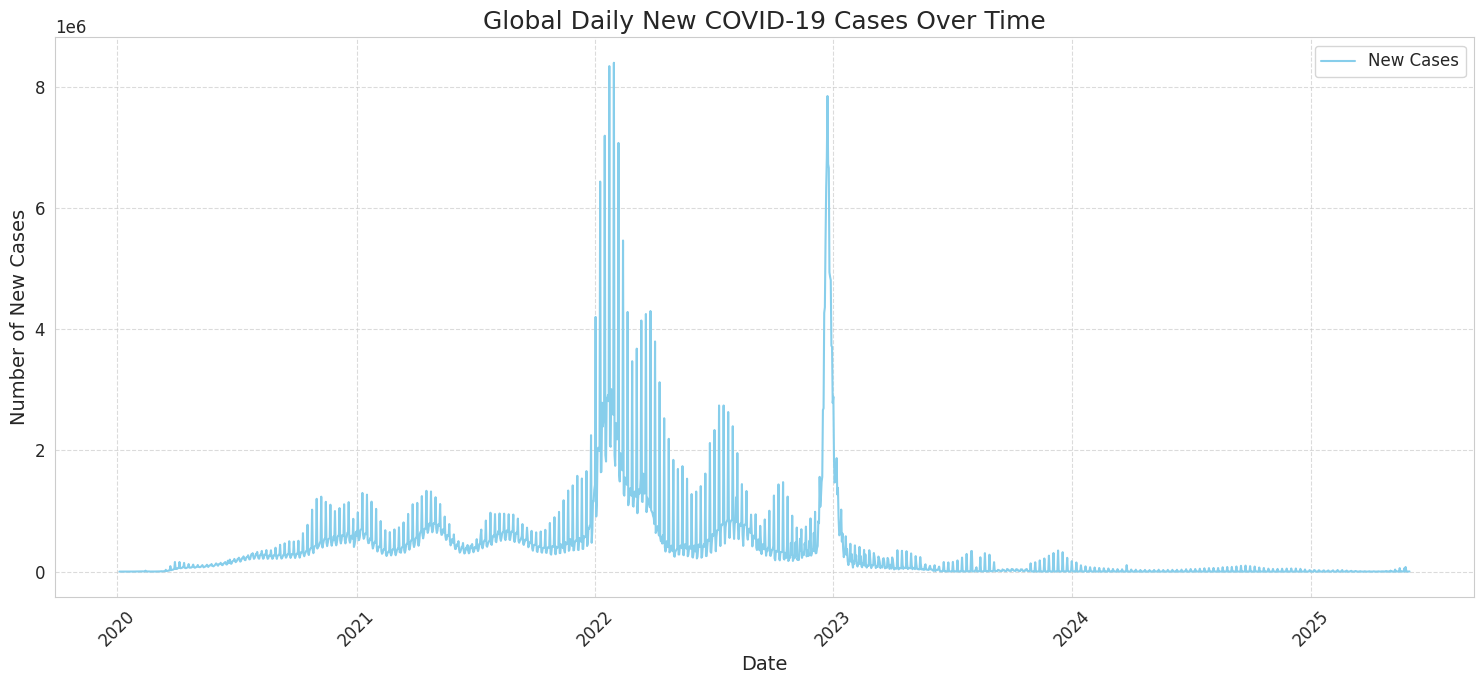

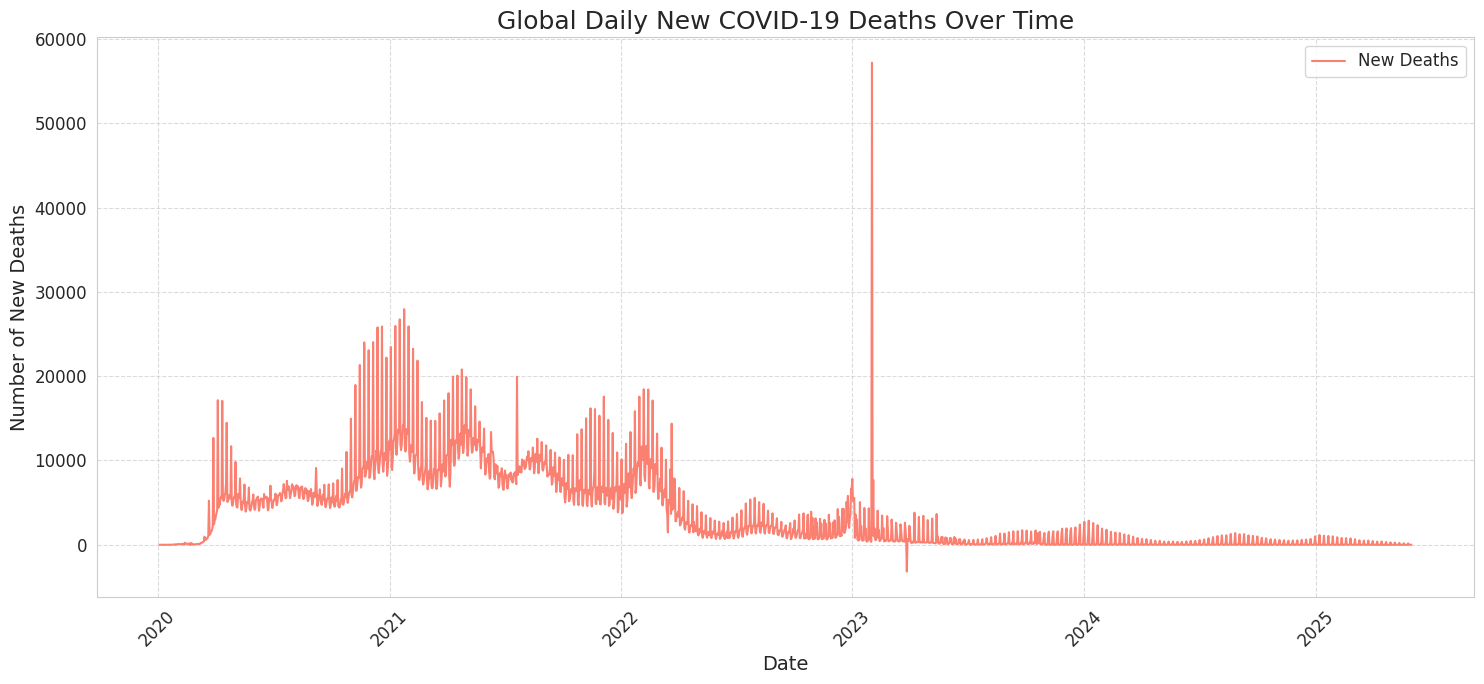

Global new cases and deaths trends plotted.


In [18]:
#Global Trends - Cases and Deaths Over Time
print("--- Global Trends: New Cases and Deaths Over Time ---")

# Aggregate global daily new cases and deaths
global_daily_data = df.groupby('Date_reported')[['New_cases', 'New_deaths']].sum().reset_index()

# Plotting global new cases over time
plt.figure(figsize=(15, 7))
sns.lineplot(x='Date_reported', y='New_cases', data=global_daily_data, color='skyblue', label='New Cases')
plt.title('Global Daily New COVID-19 Cases Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Cases', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

# Plotting global new deaths over time
plt.figure(figsize=(15, 7))
sns.lineplot(x='Date_reported', y='New_deaths', data=global_daily_data, color='salmon', label='New Deaths')
plt.title('Global Daily New COVID-19 Deaths Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Deaths', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

print("Global new cases and deaths trends plotted.")

--- Top Countries by Cumulative Cases and Deaths ---

--- Top 10 Countries by Total Cases ---
                                               Country  New_cases  New_deaths
229                           United States of America  103436829     1224428
42                                               China   99381761      122398
96                                               India   45050188      533693
72                                              France   39039783      168162
78                                             Germany   38437864      174979
28                                              Brazil   37736159      702875
175                                  Republic of Korea   34571873       35934
111                                              Japan   33803572       74694
109                                              Italy   26968605      198523
226  United Kingdom of Great Britain and Northern I...   25049768      232112


/tmp/ipython-input-19-1612574934.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='New_cases', y='Country', data=top_10_cases_countries, palette='viridis')


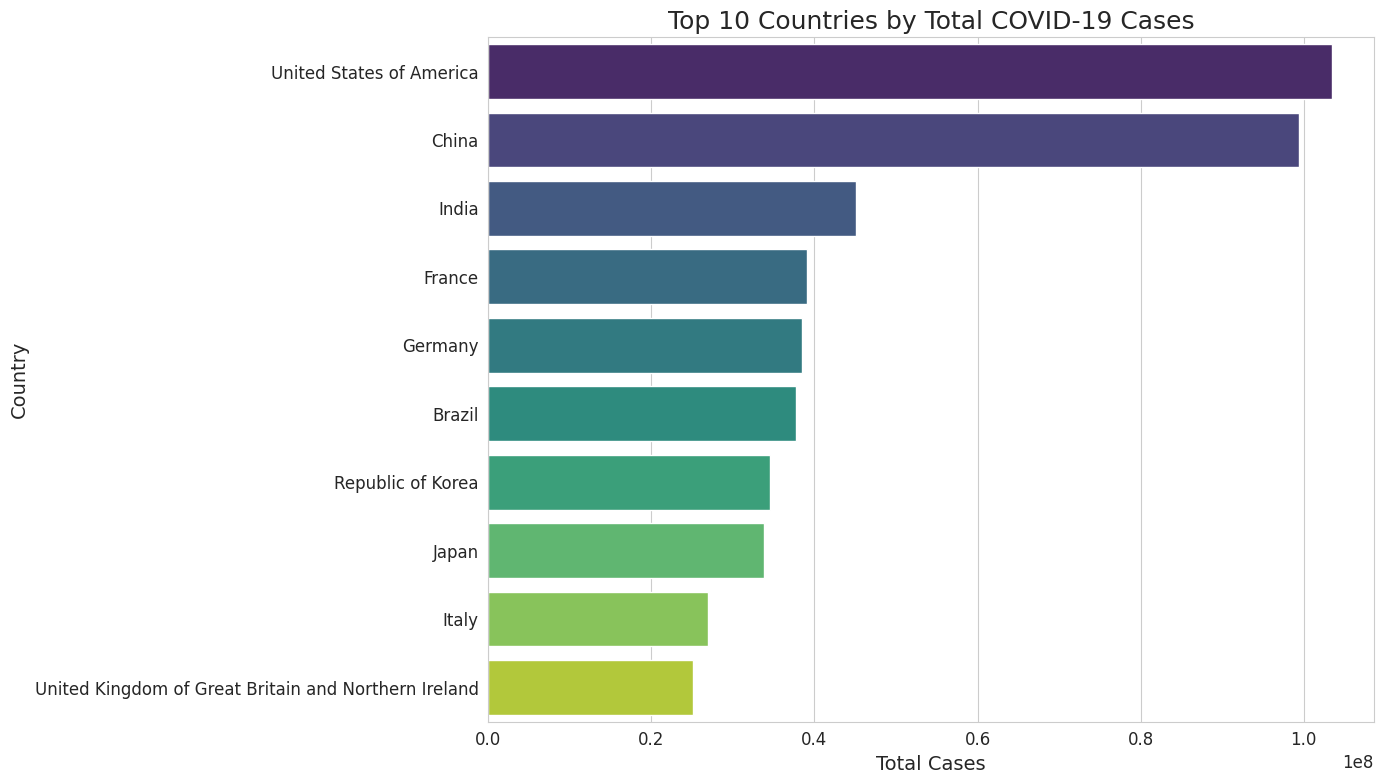


--- Top 10 Countries by Total Deaths ---
                                               Country  New_cases  New_deaths
229                           United States of America  103436829     1224428
28                                              Brazil   37736159      702875
96                                               India   45050188      533693
178                                 Russian Federation   24901467      404290
140                                             Mexico    7622513      334818
226  United Kingdom of Great Britain and Northern I...   25049768      232112
168                                               Peru    4532259      221055
109                                              Italy   26968605      198523
78                                             Germany   38437864      174979
72                                              France   39039783      168162


/tmp/ipython-input-19-1612574934.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='New_deaths', y='Country', data=top_10_deaths_countries, palette='plasma')


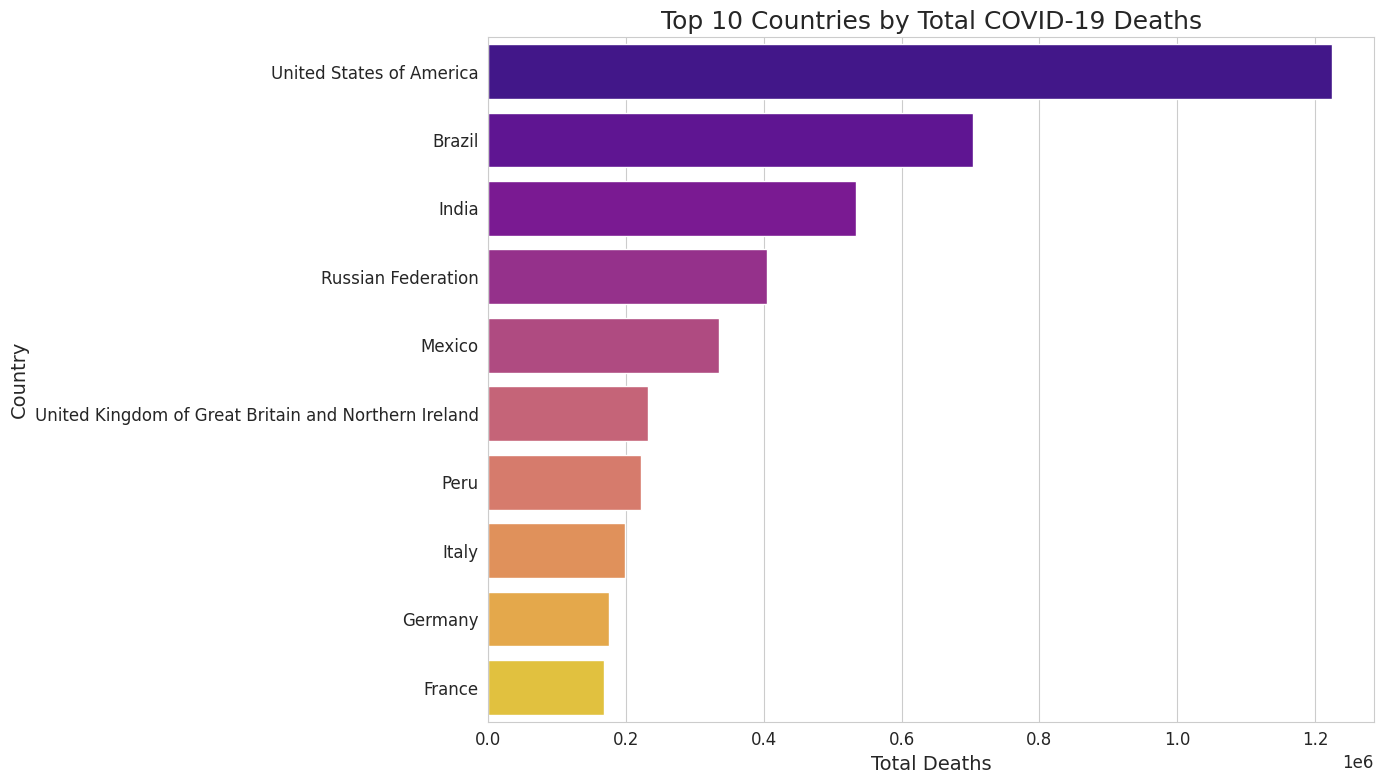

Top countries by cases and deaths plotted.


In [19]:
#  Top Countries by Cumulative Cases and Deaths
print("--- Top Countries by Cumulative Cases and Deaths ---")

# Calculate cumulative cases and deaths per country
country_cumulative_data = df.groupby('Country')[['New_cases', 'New_deaths']].sum().reset_index()
country_cumulative_data = country_cumulative_data.sort_values(by='New_cases', ascending=False)

# Top 10 Countries by Total Cases
top_10_cases_countries = country_cumulative_data.head(10)
print("\n--- Top 10 Countries by Total Cases ---")
print(top_10_cases_countries)

plt.figure(figsize=(14, 8))
sns.barplot(x='New_cases', y='Country', data=top_10_cases_countries, palette='viridis')
plt.title('Top 10 Countries by Total COVID-19 Cases', fontsize=18)
plt.xlabel('Total Cases', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.tight_layout()
plt.show()

# Top 10 Countries by Total Deaths
top_10_deaths_countries = country_cumulative_data.sort_values(by='New_deaths', ascending=False).head(10)
print("\n--- Top 10 Countries by Total Deaths ---")
print(top_10_deaths_countries)

plt.figure(figsize=(14, 8))
sns.barplot(x='New_deaths', y='Country', data=top_10_deaths_countries, palette='plasma')
plt.title('Top 10 Countries by Total COVID-19 Deaths', fontsize=18)
plt.xlabel('Total Deaths', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.tight_layout()
plt.show()

print("Top countries by cases and deaths plotted.")

--- Daily New Cases/Deaths by WHO Region ---


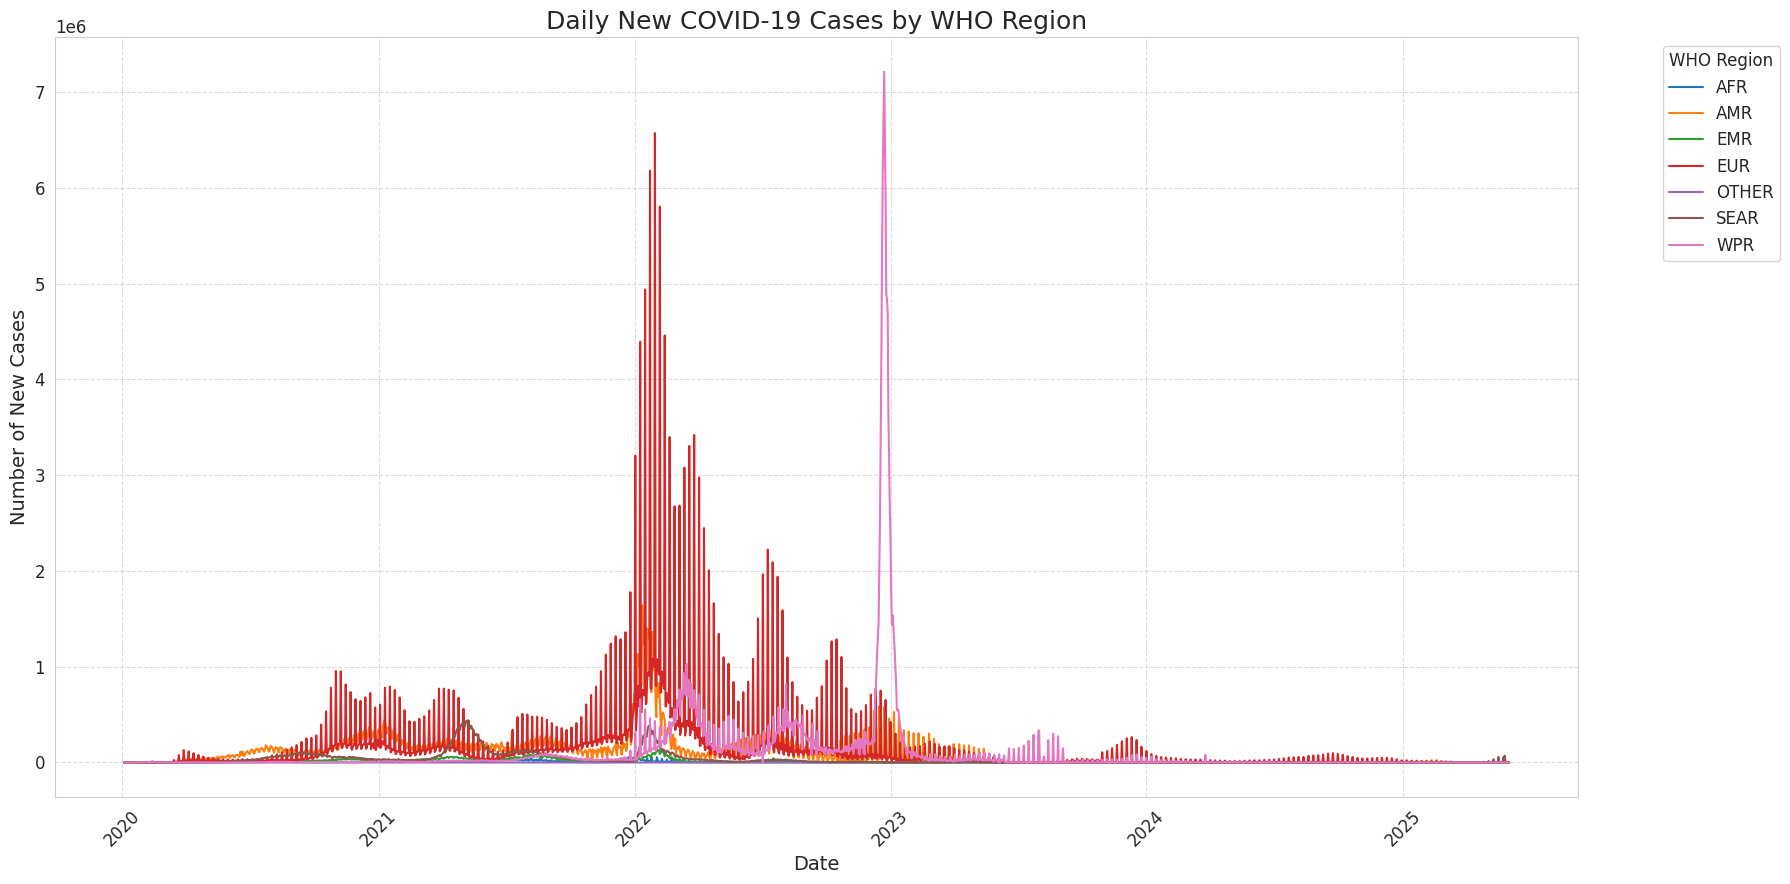

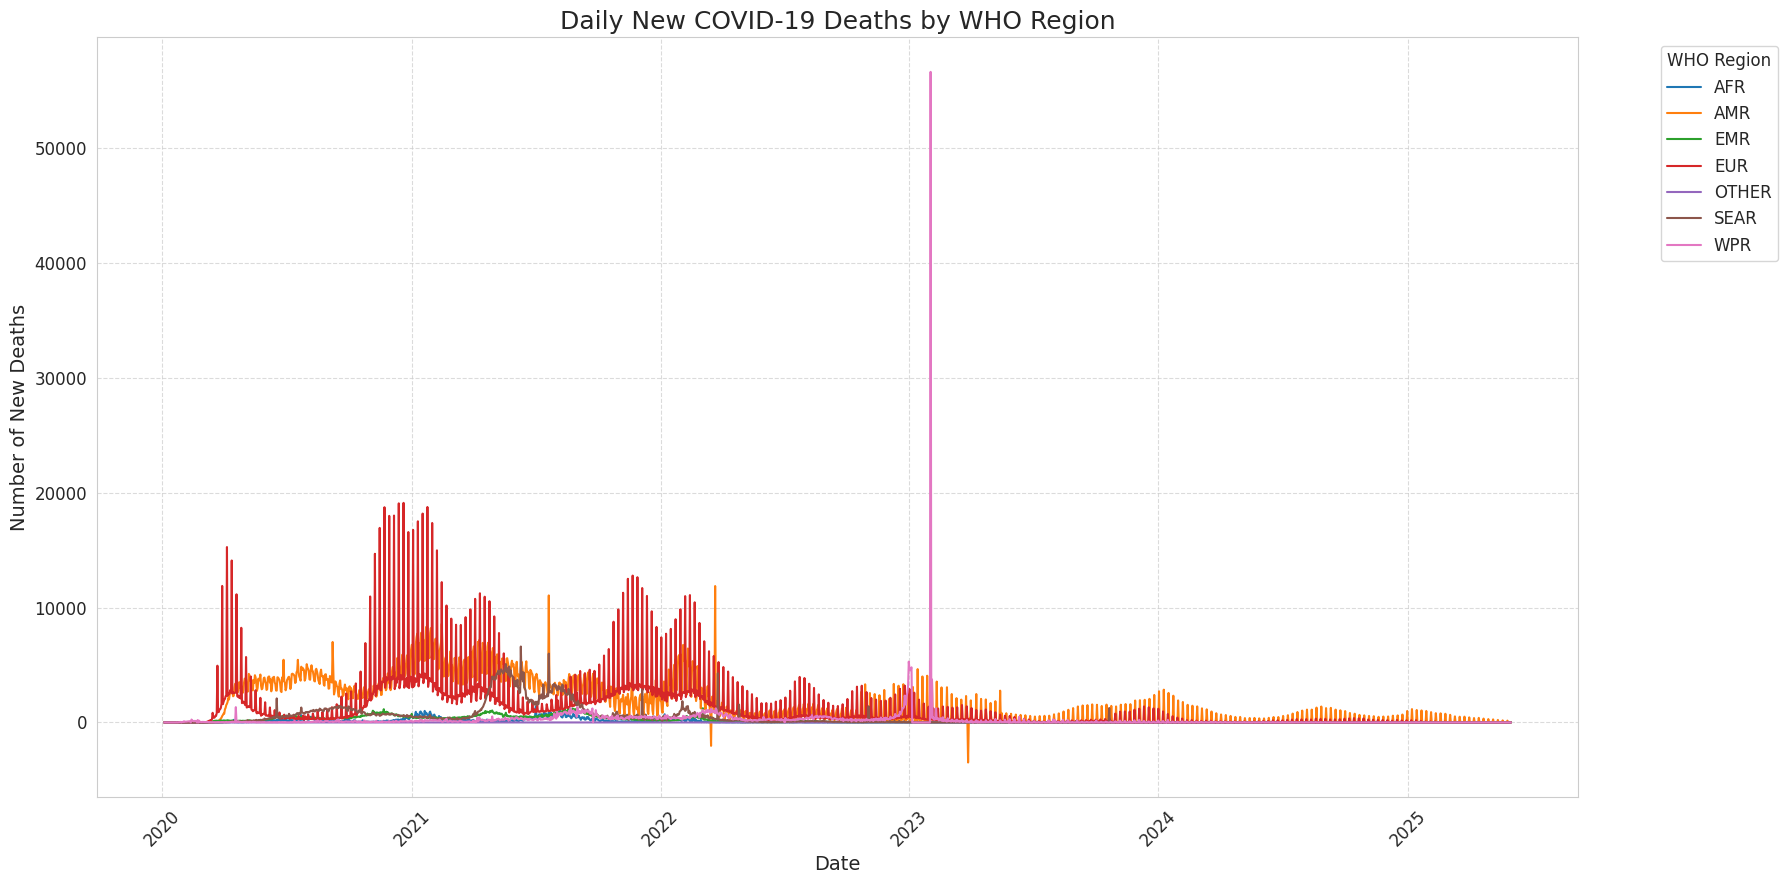

Daily new cases and deaths by WHO Region plotted.


In [23]:
# Daily New Cases/Deaths by WHO Region
print("--- Daily New Cases/Deaths by WHO Region ---")

# Aggregate daily new cases and deaths by WHO Region
region_daily_data = df.groupby(['Date_reported', 'WHO_region'])[['New_cases', 'New_deaths']].sum().reset_index()

# Plotting new cases by WHO Region
plt.figure(figsize=(18, 9))
sns.lineplot(x='Date_reported', y='New_cases', hue='WHO_region', data=region_daily_data, palette='tab10', linewidth=1.5)
plt.title('Daily New COVID-19 Cases by WHO Region', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Cases', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title='WHO Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting new deaths by WHO Region
plt.figure(figsize=(18, 9))
sns.lineplot(x='Date_reported', y='New_deaths', hue='WHO_region', data=region_daily_data, palette='tab10', linewidth=1.5)
plt.title('Daily New COVID-19 Deaths by WHO Region', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Deaths', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title='WHO Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Daily new cases and deaths by WHO Region plotted.")

--- Case Fatality Ratio (CFR) Analysis ---

--- Top 15 Countries by Case Fatality Ratio (CFR) ---
                    Country  New_cases  New_deaths        CFR
236                   Yemen      11945        2159  18.074508
206                   Sudan      63993        5046   7.885237
210    Syrian Arab Republic      57423        3163   5.508246
201                 Somalia      27334        1361   4.979147
168                    Peru    4532259      221055   4.877369
61                    Egypt     516023       24830   4.811801
140                  Mexico    7622513      334818   4.392488
26   Bosnia and Herzegovina     404278       16406   4.058099
124                 Liberia       7932         294   3.706505
0               Afghanistan     235214        7998   3.400308
60                  Ecuador    1080138       36058   3.338277
156                   Niger       9564         315   3.293601
148                 Myanmar     643266       19494   3.030473
130                  Malawi      8

/tmp/ipython-input-25-2231779900.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CFR', y='Country', data=top_15_cfr_countries, palette='coolwarm')


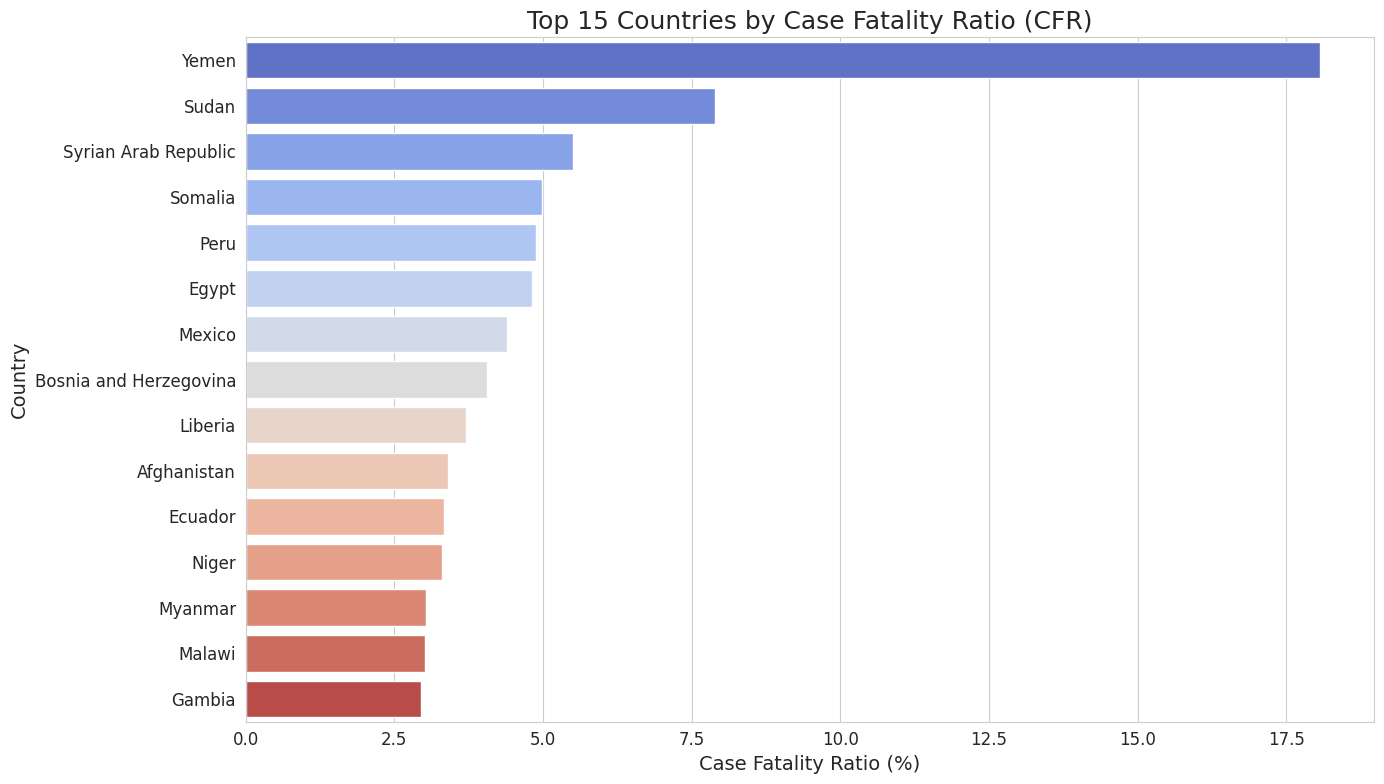


--- WHO Region by Case Fatality Ratio (CFR) ---
  WHO_region  New_cases  New_deaths       CFR
0        AFR    9588119      175532  1.830724
4      OTHER        764          13  1.701571
1        AMR  193561038     3058085  1.579907
2        EMR   23417911      351975  1.503016
5       SEAR   61605942      808956  1.313114
3        EUR  281265615     2280688  0.810866
6        WPR  208610786      421686  0.202140


/tmp/ipython-input-25-2231779900.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CFR', y='WHO_region', data=region_cumulative_for_cfr, palette='rocket')


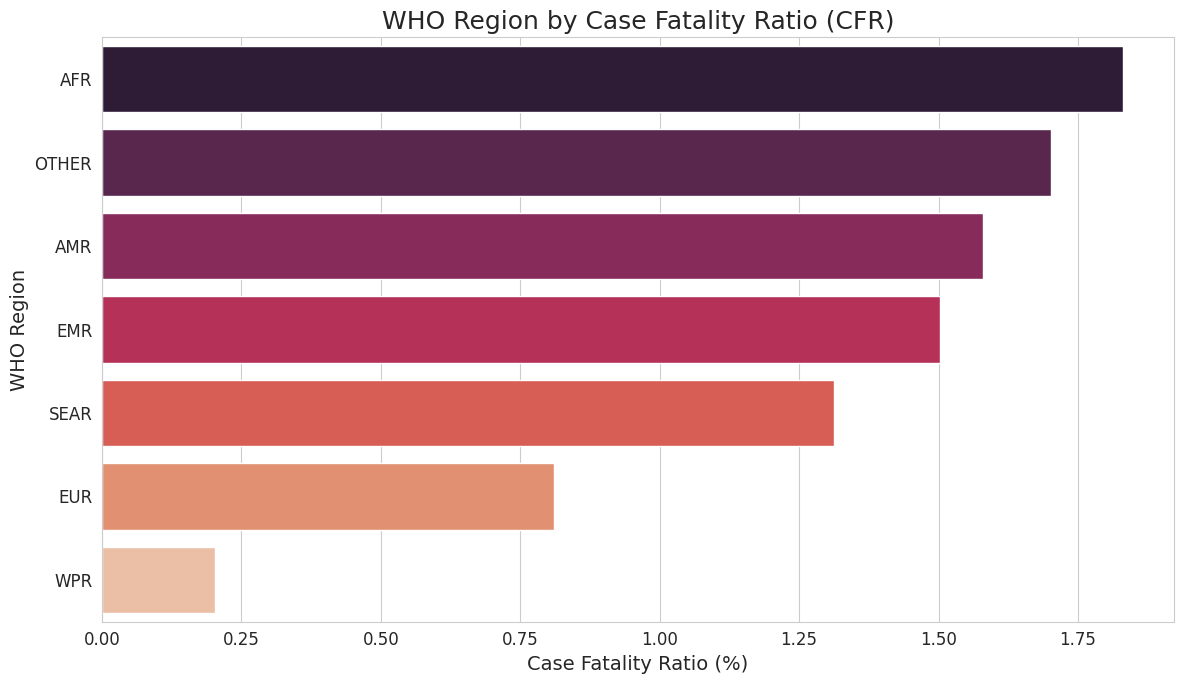

CFR analysis for countries and regions plotted.


In [25]:
# Case Fatality Ratio (CFR) by Country/Region
print("--- Case Fatality Ratio (CFR) Analysis ---")

# Calculate CFR for each country (Cumulative Deaths / Cumulative Cases * 100)
# To avoid division by zero, handle cases where New_cases is 0
country_cumulative_for_cfr = df.groupby('Country')[['New_cases', 'New_deaths']].sum().reset_index()
country_cumulative_for_cfr['CFR'] = (country_cumulative_for_cfr['New_deaths'] / country_cumulative_for_cfr['New_cases']).fillna(0) * 100

# Filter out countries with very few cases that might skew CFR (e.g., less than 1000 total cases)
country_cumulative_for_cfr = country_cumulative_for_cfr[country_cumulative_for_cfr['New_cases'] >= 1000]
country_cumulative_for_cfr = country_cumulative_for_cfr.sort_values(by='CFR', ascending=False)

# Top 15 Countries by CFR
top_15_cfr_countries = country_cumulative_for_cfr.head(15)
print("\n--- Top 15 Countries by Case Fatality Ratio (CFR) ---")
print(top_15_cfr_countries)

plt.figure(figsize=(14, 8))
sns.barplot(x='CFR', y='Country', data=top_15_cfr_countries, palette='coolwarm')
plt.title('Top 15 Countries by Case Fatality Ratio (CFR)', fontsize=18)
plt.xlabel('Case Fatality Ratio (%)', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.tight_layout()
plt.show()

# Calculate CFR for each WHO Region
region_cumulative_for_cfr = df.groupby('WHO_region')[['New_cases', 'New_deaths']].sum().reset_index()
region_cumulative_for_cfr['CFR'] = (region_cumulative_for_cfr['New_deaths'] / region_cumulative_for_cfr['New_cases']).fillna(0) * 100
region_cumulative_for_cfr = region_cumulative_for_cfr.sort_values(by='CFR', ascending=False)

print("\n--- WHO Region by Case Fatality Ratio (CFR) ---")
print(region_cumulative_for_cfr)

plt.figure(figsize=(12, 7))
sns.barplot(x='CFR', y='WHO_region', data=region_cumulative_for_cfr, palette='rocket')
plt.title('WHO Region by Case Fatality Ratio (CFR)', fontsize=18)
plt.xlabel('Case Fatality Ratio (%)', fontsize=14)
plt.ylabel('WHO Region', fontsize=14)
plt.tight_layout()
plt.show()

print("CFR analysis for countries and regions plotted.")

--- Distribution of Daily New Cases and Deaths (Histograms) ---


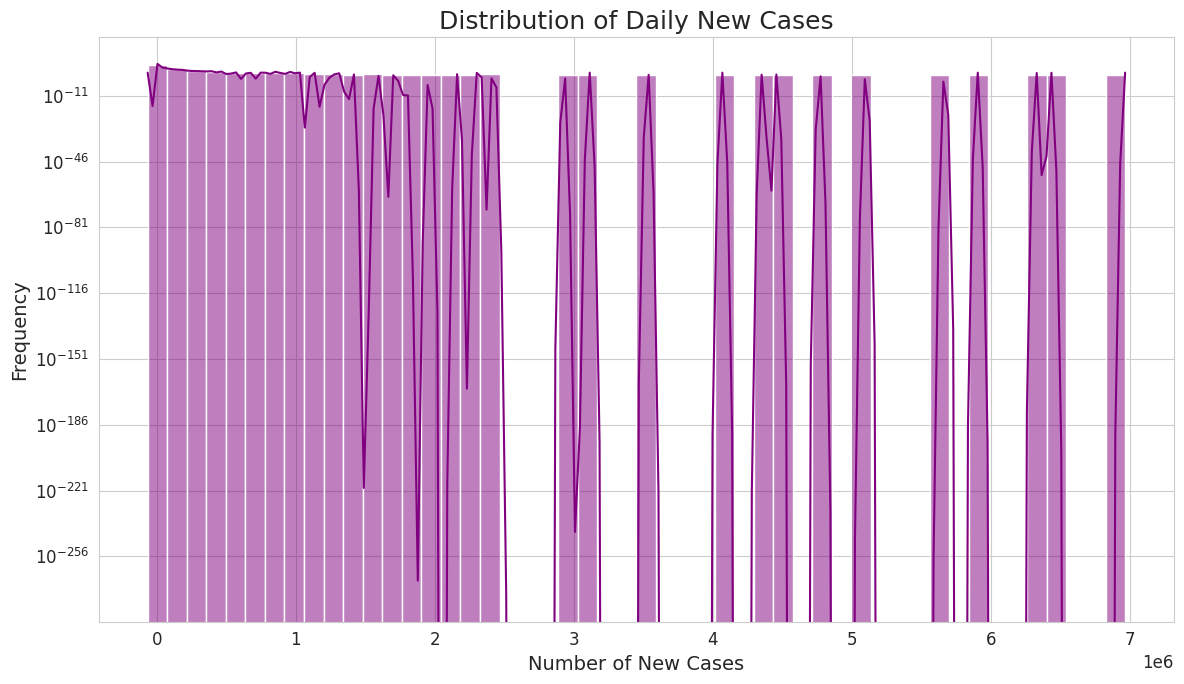

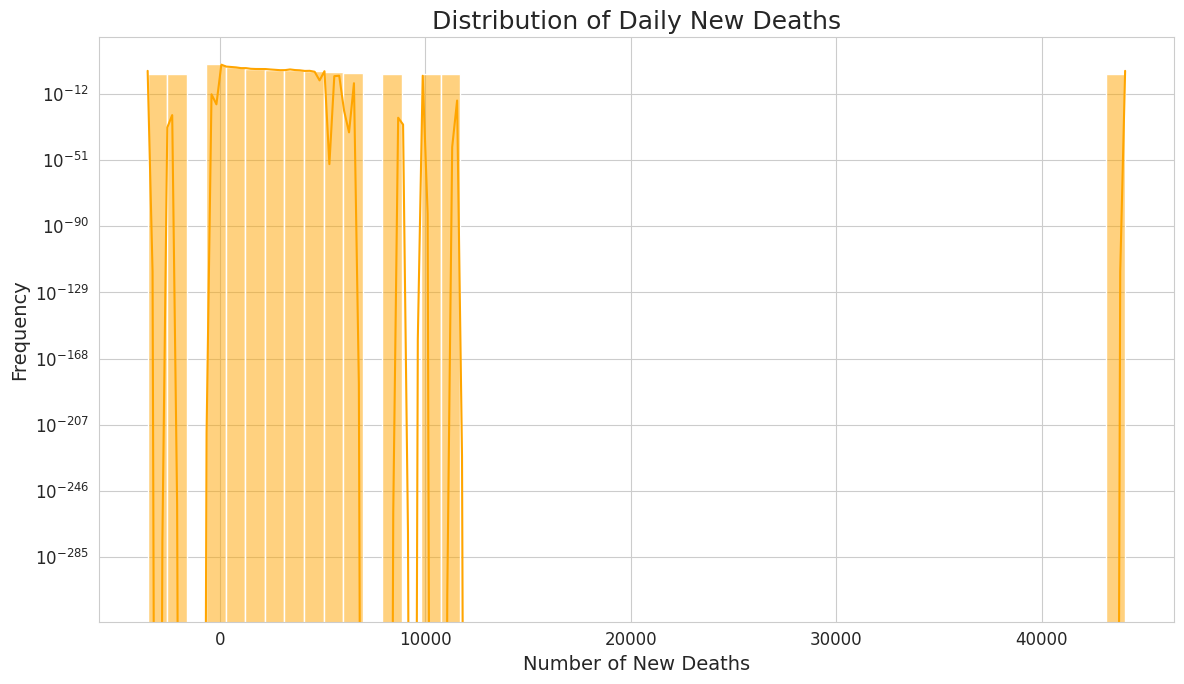

Histograms for daily new cases and deaths plotted.


In [26]:
# Distribution of Daily New Cases and Deaths
print("--- Distribution of Daily New Cases and Deaths (Histograms) ---")

# Plotting histogram for daily new cases
plt.figure(figsize=(12, 7))
sns.histplot(df['New_cases'], bins=50, kde=True, color='purple')
plt.title('Distribution of Daily New Cases', fontsize=18)
plt.xlabel('Number of New Cases', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.yscale('log') # Use log scale for y-axis due to skewed data
plt.tight_layout()
plt.show()

# Plotting histogram for daily new deaths
plt.figure(figsize=(12, 7))
sns.histplot(df['New_deaths'], bins=50, kde=True, color='orange')
plt.title('Distribution of Daily New Deaths', fontsize=18)
plt.xlabel('Number of New Deaths', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.yscale('log') # Use log scale for y-axis due to skewed data
plt.tight_layout()
plt.show()

print("Histograms for daily new cases and deaths plotted.")

--- Correlation between Daily New Cases and Deaths for a specific country ---

Correlation between New Cases and New Deaths in United States of America: 0.63


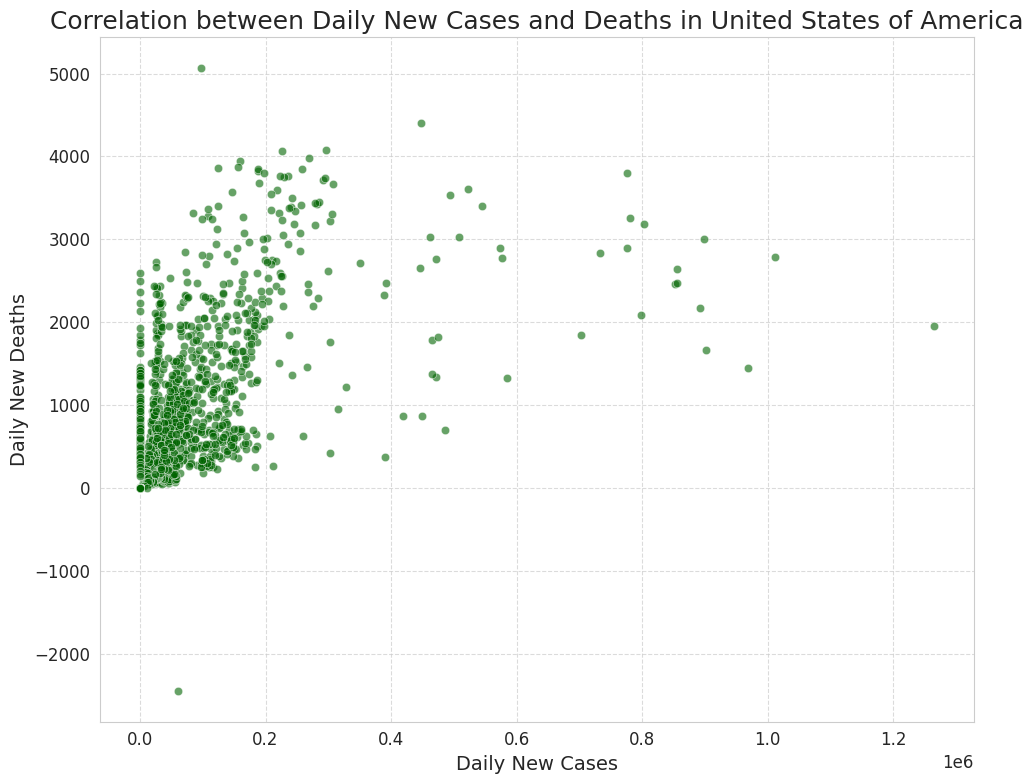

Correlation analysis for a specific country complete.


In [27]:
# Correlation between Daily New Cases and Deaths for a specific country
print("--- Correlation between Daily New Cases and Deaths for a specific country ---")

# Let's pick a country with significant data, e.g., 'United States of America' or 'India'
# You can change the country_name to analyze others.
country_name = 'United States of America'
country_data = df[df['Country'] == country_name].copy()

if not country_data.empty:
    # Ensure numerical types
    country_data['New_cases'] = pd.to_numeric(country_data['New_cases'])
    country_data['New_deaths'] = pd.to_numeric(country_data['New_deaths'])

    # Calculate Pearson correlation
    correlation = country_data['New_cases'].corr(country_data['New_deaths'])
    print(f"\nCorrelation between New Cases and New Deaths in {country_name}: {correlation:.2f}")

    # Plotting scatter plot for correlation
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='New_cases', y='New_deaths', data=country_data, alpha=0.6, color='darkgreen')
    plt.title(f'Correlation between Daily New Cases and Deaths in {country_name}', fontsize=18)
    plt.xlabel('Daily New Cases', fontsize=14)
    plt.ylabel('Daily New Deaths', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print(f"No data found for {country_name}.")

print("Correlation analysis for a specific country complete.")